<a href="https://colab.research.google.com/github/sbborusu/530pm_Agentic_Ai_Batch_7thApril/blob/main/CB_SupportVectorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
# import iris dataset from sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
import pandas as pd

In [216]:
iris = load_iris()
print(dir(iris))
print(iris.feature_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Create a dataframe

In [217]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [218]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [219]:
# check how many target columns have 0, 1,2 in them
print(len(df[df.target == 0]))
print(len(df[df.target == 1]))
print(len(df[df.target == 2]))

50
50
50


# Basic lambda function usage

In [220]:
x = lambda a : a + 10
print(x(5))

x = lambda a,b : a * b
print(x(6,5))

15
30


# Basic apply function usage (generate one column with another column)

In [221]:
s = pd.Series([1,2,3])
print(s)
t = s.apply(lambda x : x * 2)
print(t)

# Apply on all columns
pds = pd.DataFrame({'A': [1,2], 'B' : [10,20]})
pdn = pds.apply(lambda x : x + 2)
print(pds)
print(pdn)

# Apply on column and generate another column
pds = pd.DataFrame({'A': [1,2], 'B' : [10,20]})
pds['C'] = pds.B.apply(lambda x : x + 2)
print(pds)

0    1
1    2
2    3
dtype: int64
0    2
1    4
2    6
dtype: int64
   A   B
0  1  10
1  2  20
   A   B
0  3  12
1  4  22
   A   B   C
0  1  10  12
1  2  20  22


# Add flower names

In [222]:
df['flower_names'] = df.target.apply(lambda x : iris.target_names [x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


# Seperate out the dataframes based on their family

In [223]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

# Draw a scatter plot

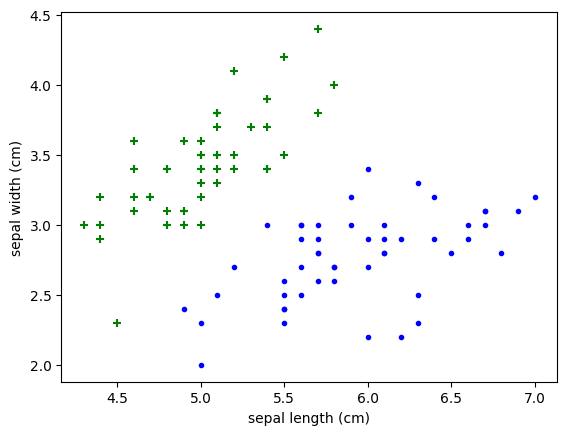

In [224]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'green', marker = '+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

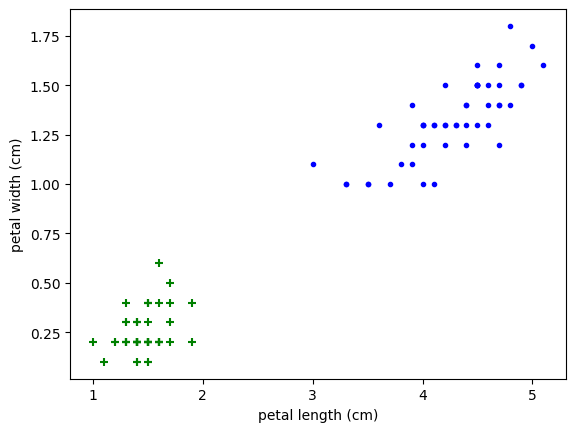

In [225]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'green', marker = '+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

# Train/Test split



In [226]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']], df['target'], test_size=0.2)
#model = SVC()

# Train the model

In [227]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333